# 3.1. Autoencoders

* Los autoencoders son un tipo específico de red neuronal en el que **la entrada es la misma que la salida**.

<br>

![Esquema autoencoder](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/autoencoder0.png)

<br>

* Se entrenan de forma **no supervisada** para reconstruir a la salida lo mismo que reciben como entrada.

* Esta tarea (replicar la entrada) por sí misma no tendría ninguna utilidad.

* Sin embargo, en este tipo de redes, el tamaño de la capa intermedia suele tener un tamaño inferior al de la entrada.

* Esto fuerza a que se tenga que aprender una **representación reducida** que permita reconstruir la entrada con la menor pérdida posible.

* Estas redes están compuestas de tres partes:

 * Una parte inicial llamada **encoder** que codifica los datos.
 * Una parte intermedia con la representación codificada de los datos.
 * Una parte final llamada **decoder** que descodifica los datos.


<br>

![Esquema autoencoder](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/autoencoder1.jpg)

<br>


* La representación intermedia codificada debe de contener las características esenciales de los datos para que al realizar la reconstrucción se pueda recuperar la entrada original.

* Por lo tanto, la red, de forma **no supervisada**, aprende a:
 * Extraer las características importantes que representan una información.
 * Comprimir los datos con la menor pérdida posible.


## Utilidades

* Como hemos dicho, los autoencoders nos permiten aprender una **representación comprimida** de los datos.

* Sin embargo, esta es solo una de las muchas aplicaciones para las que se utilizan.

* Inicialmente se crearon para **inicializar los pesos de las redes**:
 * Se entrena de forma no supermisada un autoencoder (por lo que no hacía falta etiquetar los datos), y posteriormente se reutiliza solo la parte del encoder.

* La representación intermedia permite:
 * Agrupar o crear **clusters** de datos similares.
 * Realizar **búsquedas** de datos similares.

* Además también es posible entrenar al autoencoder de forma **supervisada** o **auto-supervisada** para que realice otro tipo de tareas, como por ejemplo:

 - Aumentar la resolución (*super-resolution*)
 - Eliminar ruido (*denoising*)
 - Colorear imágenes
 - Binarización
 - Detección de anomalías
 - Segmentación
 - Segmentación semántica


* A continuación se muestra algunos ejemplos:

<br>

![Ejemplos aplicaciones](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/applications_examples.png)

<br>


## Arquitectura


* Este tipo de red consta de dos partes:

 * **Encoder**: la parte de la red que comprime la entrada en un espacio de variables latentes y que puede representarse mediante la función de codificación `e(x)`.

 * **Decoder**: la parte que trata de reconstruir la entrada en base a la información recolectada previamente. Se representa mediante la función de decodificación `d(x)`.

* Por tanto, el autoencoder se puede escribir como la función `d(e(x)) = x'` donde `x'` representa a la reconstrucción, la cual debe ser lo más similar posible a la entrada original `x`.

* Para crear un autoencoder tipo perceptrón multicapa (formado por neuronas artificiales) tendríamos que añadir:

 * Una **capa de entrada** con tantas neuronas como necesitemos.
 * Una **capa intermedia** con un número inferior de neuronas al de la capa de entrada.
 * Una **capa de salida** con el mismo número de neuronas que la capa de entrada.  

* A continuación se muestra un ejemplo:

<br>

![Esquema autoencoder](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/autoencoder2.png)

<br>



* Utilizando la librería **tf.Keras** podríamos definir un Autoencoder de la siguiente forma:


```
# Entrada con 784 neuronas
input_img = Input(shape=(784,))   

# Capa intermedia con 32 neuronas
encoded = Dense(32, activation='relu')(input_img)

# Capa de salida con 784 neuronas
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_img, outputs=decoded)
```


* Idealmente es posible diseñar un autoencoder que reconstruya con éxito cualquier entrada. Para esto hay que definir de forma adecuada la arquitectura de la red en función de la complejidad de los datos a modelar.


### Funciones de activación

* Para las funciones de activación internas (todas las capas excepto la de salida) se recomienta el uso de la función de activación **ReLU**.

* Para la función de activación de la capa de salida tenemos distintas opciones:
 * Lineal
 * Sigmoidea
 * Softmax

* El uso de una u otra dependerá de la aplicación en concreto a implementar.

 * Si la salida representa un valor continuo tendremos que usar activación lineal.

 * Si la salida tiene que estar acotada en un rango usaremos activación sigmoide.

 * Si la salida representa dos clases (imágenes en blanco y negro o tareas de binarización o segmentación) tendremos que usar la función sigmoidea.

 * Si pretendemos clasificar en más de dos clases: softmax  

### Función de pérdida

* Para entrenar un autoencoder podemos encontrar soluciones usando las siguientes tres funciones de pérdida:

 * mse - Mean squared error
 * mae - Mean absolute error
 * binary crossentropy

* De entre estas tres las más comunes o más recomendadas son *mse* y *binary crossentropy*.

* *Binary crossentropy* se recomienda especialmente cuando la función de activación de salida de la red es la función sigmoidea, lo que puede producir una saturación de loss (llamado efecto "*plateau*").



### Entrenamiento

* Para el entrenamiento de este tipo de redes usaremos el algoritmo estándar de **backpropagation**.

* Podremos utilizar cualquier **optimizador**, aunque uno de los más utilizados actualmente y recomendables es Adam.

* Por lo tanto, para compilar con tf.Keras el autoencoder del ejemplo anterior tendríamos que escribir:

```
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
```

* Para entrenar este modelo tenemos que llamar a `fit` de forma normal, pero teniendo cuidado de pasar los **mismos datos a la entrada y a la salida**:

```
model.fit(train_images, train_images,
          epochs=15,
          batch_size=64)
```



# Ejemplo básico

* Vamos a hacer un ejemplo para codificar la base de datos *Fashion MNIST*.

* Para esto crearemos una red muy sencilla con 3 capas densas.

* En primer lugar vamos a cargar el dataset a utilizar...


4422102/4422102 [==============================] - 0s 0us/step


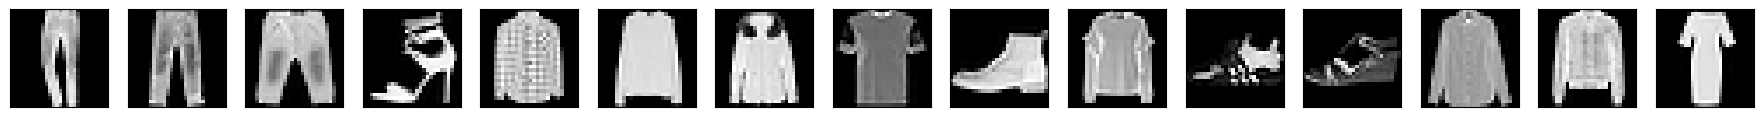

Train_images shape: (60000, 28, 28)
Test_images shape: (10000, 28, 28)


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(1)  # Fijamos la semilla de TF
np.random.seed(1)  # Fijamos la semilla

# Cargamos los datos
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()


# Mostramos 15 imágenes aleatorias de este dataset
n = 15
index = np.random.randint(len(train_images), size=n)
plt.figure(figsize=(n*1.5, 1.5))
for i in np.arange(n):
    ax = plt.subplot(1,n,i+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(train_images[index[i]], cmap='gray')
plt.show()


print('Train_images shape:', train_images.shape)
print('Test_images shape:', test_images.shape)


<br>

* A continuación preparamos los datos para entrenar a la red...



In [2]:

TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)

# Convertir de (N, 28, 28) a (N, 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))


# Convertir un array de unit8 (enteros) en float32 (decimales)
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

# Normalizar los datos al rango [0,1]
# Como los valores de gris de las imágenes están en el rango [0,255]
# simplemente dividimos por 255
train_images /= 255
test_images /= 255

print('Train_images shape:', train_images.shape)
print('Test_images shape:', test_images.shape)


Train_images shape: (60000, 784)
Test_images shape: (10000, 784)


<br>

* El siguiente paso es definir el autoencoder a utilizar.

* Dado que la dimensionalidad de los datos es de 784 vamos a definir las capas de entrada y de salida con este tamaño.

* La capa intermedia con la codificación tendrá una **dimensión de 32 neuronas**, por lo que se comprimirán los datos en un factor de 24.5.

* A continuación se muestra el esquema de la red a implementar:


<br>

![Esquema autoencoder](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/autoencoder_ejemplo.png)

<br>

In [3]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense


# Tamaño de la representación intermedia
encoding_dim = 32

# Entrada
input_img = Input(shape=(784,))

# Codificación intermedia con 32 neuronas
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Capa de salida con 784 neuronas
decoded = Dense(784, activation='sigmoid')(encoded)

# Creamos el modelo usando la API funcional de Keras
model = Model(input_img, decoded)


# Mostramos un resumen de la red
print(model.summary())


# La compilamos
model.compile(optimizer='adam', loss='binary_crossentropy')


# Iniciamos el entrenamiento
model.fit(train_images, train_images, epochs=15, batch_size=64, verbose=1)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
938/938 [==============================] - 9s 3ms/step - loss: 0.3462
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2979
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2889
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss:

313/313 [==============================] - 1s 2ms/step


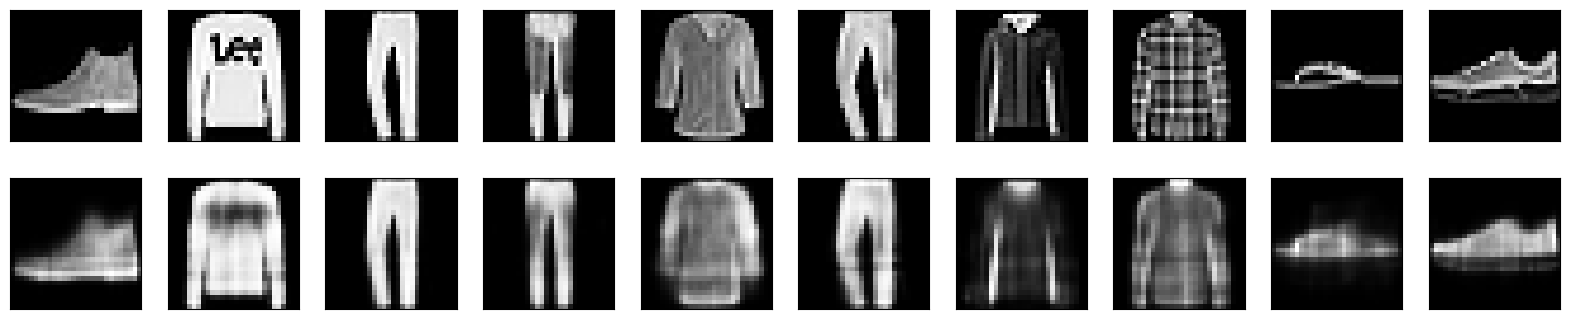

Vamos a mostrar cómo codifica las imágenes
313/313 [==============================] - 0s 1ms/step

Vector de características de la imagen 150:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.12156863 0.20784314 0.40784314 0.5686275
 0.34901962 0.19215687 0.38431373 0.5686275  0.53333336 0.22745098
 0.21960784 0.08627451 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.41960785
 0.4        0.32941177 0.21960784 0.5882353  0.85490197 0.96862745
 1.         0.74509805 0.2901961  0.2784314  0.36862746 0.44705883
 0.25490198 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.13725491 0.39215687 0.27058825 0.27450982
 0.2784314  0.1254902  0.11764706 0.14509805 0.20784314 0.12156863
 0.20784314 0.3019608  0.2784314  0.33333334 0.4        0.06666667
 0.         0.         0.  

In [4]:
#----------------------------------------------------
def show_autoencoder_result(test_images, prediction):
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(test_images[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(prediction[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()



# Utilizamos el modelo aprendido para predecir el resultado del conjunto de test
prediction = model.predict( test_images )

show_autoencoder_result( test_images, prediction )


print('Vamos a mostrar cómo codifica las imágenes')
modelEncoder = Model(input_img, encoded)

predictions = modelEncoder.predict(test_images)

print('\nVector de características de la imagen 150:')
print(test_images[150])
print('\nVector codificado:')
print(predictions[150])


# Deep autoencoder

* A la hora de crear la arquitectura del autoencoder no es necesario limitarse a una única capa oculta.

* Podemos añadir tantas capas como queramos siempre que creemos la estructura de encoder-decoder:
 * Para esto en la parte del encoder tendremos que ir reduciendo el tamaño de la entrada.
 * Y en la parte del decoder crearemos una estructura espejo, en la que iremos aumentando el tamaño hasta recuperar la dimensionalidad original.

* A continuación se muestra un ejemplo:

```
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)

decoded = Dense(784, activation='sigmoid')(decoded)
```



# Convolutional autoencoder

* También podemos crear autoencoders con convoluciones, los cuales serán más adecuados para trabajar con imágenes.

* En este caso para reducir el tamaño usaremos operaciones de **pooling** y para aumentar el tamaño haremos "***up sampling***".

* Por tanto, en la parte del **Encoder** iremos alternando:

 * Convolution + Pooling

* Y en la parte del **Decoder**:

 * Convolution + Up sampling



<br>

![Esquema autoencoder](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/autoencoder_conv.png)

<br>

* A este tipo de arquitecturas también se las conoce como **Fully Convolutional Network (FCN)**, o red completamente convolucional, dado que no hay capas densas, solo convoluciones.

## Ejemplo

* Vamos a hacer otro ejemplo en el que crearemos un *Convolutional autoencoder*.

* Para esto usaremos también el dataset *Fashion MNIST*.

* Por lo que empezaremos cargando de nuevo este dataset y preparando los datos para el entrenamiento:


In [5]:
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

print('Train_images shape:', train_images.shape)
print('Test_images shape:', test_images.shape)

Train_images shape: (60000, 28, 28, 1)
Test_images shape: (10000, 28, 28, 1)


<br>

* A continuación vamos a definir el autoencoder, el cual consistirá en:

 * 2 capas de convolución + pooling para el encoder.

 * 2 capas de convolución + up sampling para el decoder.

* Es importante fijarse en que **la capa de salida está formada por una única convolución**.

In [6]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


# Entrada
input_img = Input(shape=(28, 28, 1))


# Encoder...
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# En este punto tenemos la representación intermedia

# Decoder...
x = Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)


# Capa de salida con 1 convolución
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


# Creamos el autoencoder y lo compilamos
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Mostramos un resumen de la red
print(autoencoder.summary())


# Entrenamos la red
history = autoencoder.fit(train_images, train_images,
                          validation_data=(test_images, test_images),
                          epochs=15, batch_size=64, verbose=1)



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 4)         292       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 4)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 4)           148 

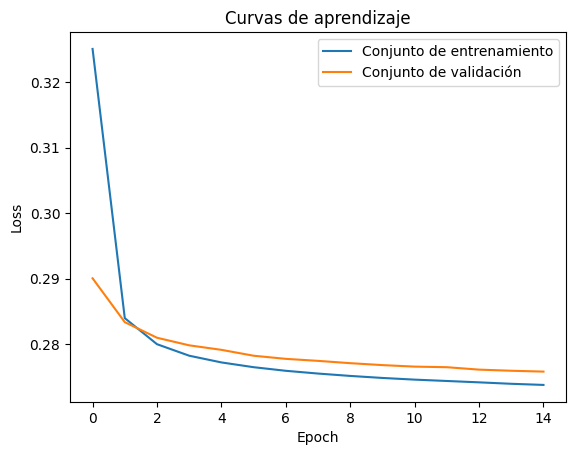

313/313 [==============================] - 1s 2ms/step


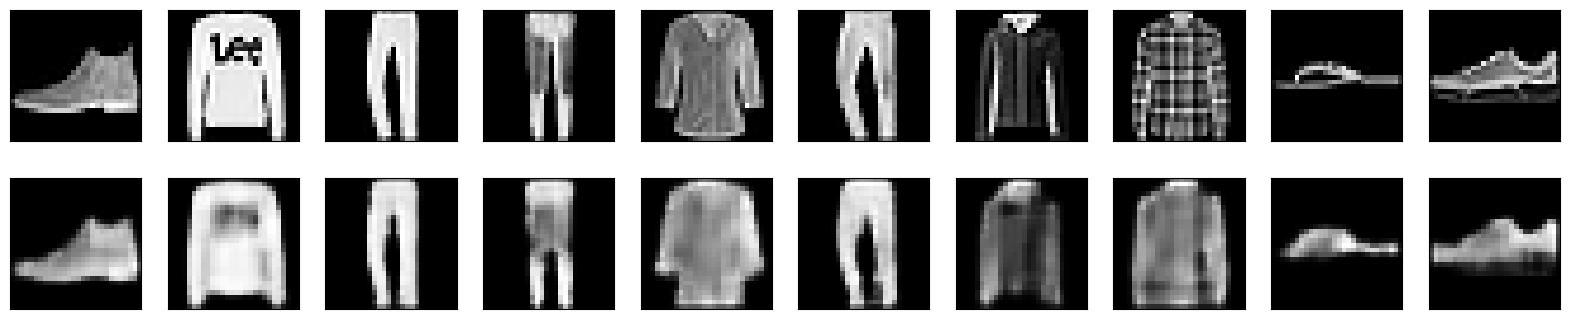

In [7]:
# -----------------------------
def plot_learning_curves(hist):
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Curvas de aprendizaje')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Conjunto de entrenamiento', 'Conjunto de validación'], loc='upper right')
  plt.show()

plot_learning_curves(history)

prediction = autoencoder.predict( test_images )

show_autoencoder_result( test_images, prediction )



* A continuación vamos a ver la representación intermedia para uno de los filtros.

313/313 [==============================] - 0s 1ms/step


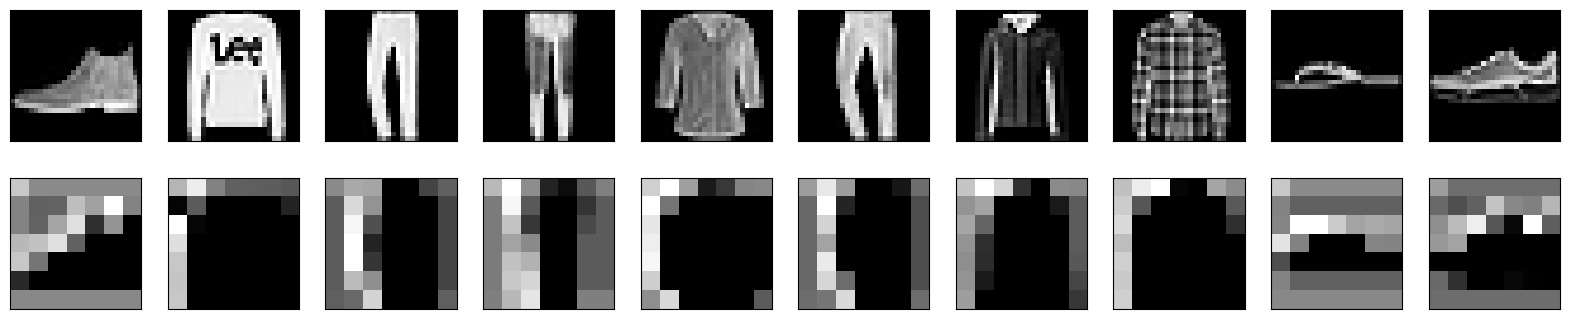

In [8]:
#----------------------------------------------------
def show_autoencoder_result(test_images, prediction):
  n = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(test_images[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(np.array(prediction[i,:,:,1] * 255., dtype=np.uint8), cmap='gray')
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

modelEncoder = Model(input_img, encoded)

predictions = modelEncoder.predict(test_images)

show_autoencoder_result(test_images, predictions)

# Más aplicaciones

* Como se ha indicado en la introducción, además de reconstruir y codificar datos, los autoencoders se pueden utilizar para muchas más cosas.

 * Inicialización de redes.
 * Clustering.
 * Búsquedas.

* Hay que tener en cuenta que todos los ejemplos que hemos visto los hemos entrenado de forma **no supervisada**. No hay ningún dato etiquetado, solo damos a la red la misma imagen a la entrada y a la salida.

* Sin embargo, estos modelos también se pueden entrenar de forma **supervisada** o **auto-supervisada** para que *reconstruyan* una salida distinta a la entrada.

* Por ejemplo, podríamos:

 * Entrenar la red dándole como entrada imágenes con ruido y como salida la misma imagen pero sin ruido. De esta forma la red aprendería a **eliminar el ruido**.

 * O entrenar la red dándole como entrada imágenes en escala de gris y como salida la misma imagen pero en color, por lo que haríamos que la red aprenda a **colorear**.

 * O entrenar la red dándole como entrada una imagen normal (en color o en escala de grises) y como salida una imagen binaria en la que se marque (en negro) una parte concreta de la imagen para que la red aprenda a detectarla. De esta forma podemos crear un **binarizador**.



<br>

![Ejemplo aplicaciones](http://www.dlsi.ua.es/~jgallego/deepraltamira/autoencoders/applications_examples.png)

<br>

<br>
<br>


---

**[&#10158;  Vamos a practicar &#10158; ](https://colab.research.google.com/drive/1TIoikDFy9S3PeyvB0MF6-HsqpuRPtqUR?usp=sharing)**

---

